In [66]:
#!/usr/bin/env python3
from scapy.all import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import requests

In [67]:
universities = [ "Peking", "Heidelberg", "Cape Town" ]

In [68]:
def readResults(name):
    resultados = {}

    rootPathResultado = f"./Resultados/Experimento1-{name}-"

    for university in universities:

        resultados[university] = pd.read_csv(rootPathResultado+university)
        resultados[university] = resultados[university].sort_values(by=['TTL'])
        
    return resultados

In [69]:
resultados = {}
resultados["Fermin"] = readResults("Fermin")
resultados["Daniel"] = readResults("Daniel")
resultados["Laureano"] = readResults("Laureano")

## Mapas con saltos

In [70]:
import ipinfo

def latitudDeIp(ip):
    key = "8ab9f510b15250"
    handler = ipinfo.getHandler(key)
    details = handler.getDetails(ip)
    return(float(details.loc.split(",")[0]))


def longitudDeIp(ip):
    key = "8ab9f510b15250"
    handler = ipinfo.getHandler(key)
    details = handler.getDetails(ip)
    return(float(details.loc.split(",")[1]))


print(longitudDeIp('24.232.105.199'))
print(latitudDeIp('24.232.105.199'))

-58.3772
-34.6131


In [71]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [72]:
def agregarLatitudyLongitud(df):
    df['lat'] = df['IP'].apply(lambda x: latitudDeIp(x) if x != '192.168.0.1' else latitudDeIp("24.232.105.199"))
    df['lng'] = df['IP'].apply(lambda x: longitudDeIp(x) if x != '192.168.0.1' else longitudDeIp("24.232.105.199"))

In [73]:
def mapaConSaltos(df,destino):
    if not('lat' in df.columns and 'lng' in df.columns):
        agregarLatitudyLongitud(df)
        print('Agregue')
    # initialize an axis
    fig, ax = plt.subplots(figsize=(24,10))
    # plot map on axis
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="lightgrey",ax=ax)

    # plot points
    df.plot(x="lng", y="lat", kind="scatter", linestyle='-', color = "blue", 
            title=f"Saltos en el mundo hasta llegar a " + destino, 
            ax=ax)

    #ax.get_legend().remove()

    
    texts = []
    for x, y, s in zip(df["lng"], df["lat"], df["TTL"]):
        texts.append(plt.text(x, y, "TLL " + str(s)))
    

    adjust_text(texts,
            only_move={'points':'y', 'text':'y'}, force_points=0.5,
            arrowprops=dict(arrowstyle="->", color='r', lw=0.4))
    
    coordenadas = []
    for i, txt in enumerate(df['TTL']):
        coordenadaActual = (round(df.iloc[i]['lng']), round(df.iloc[i]['lat']))


        print(coordenadaActual)
        #coordenadas.append(coordenadaActual)
        #ax.annotate(" TTL: " + str(txt), coordenadaActual)
                    #" (" + str(txt) +")
    # add grid
    #plt.xlim([-100, 100])
    #plt.ylim([-50, 70])

    plt.show()

In [74]:
capetown = resultados["Daniel"]["Cape Town"]
capetown

,TTL,IP,Step RTT,Total RTT
0,1,192.168.0.1,62.506620,62.506620
1,7,195.22.220.56,78.160032,78.160032
2,9,149.3.181.65,73.376441,151.536473
3,11,129.250.3.167,99.126132,250.662605
4,13,190.103.184.13,17.338030,268.000635
5,16,154.114.124.1,205.810952,473.811587


Agregue
(-58, -35)
(-58, -35)
(-47, -24)
(-80, 26)
(-80, 26)
(18, -34)


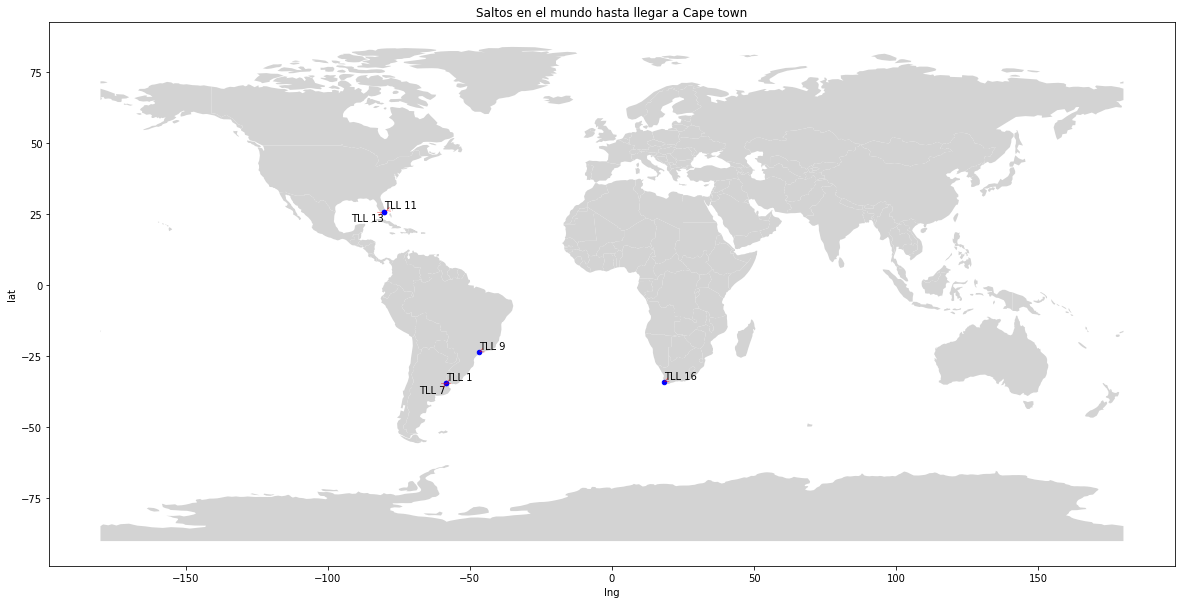

In [75]:
mapaConSaltos(capetown, "Cape town")

In [76]:
heidelberg = resultados["Fermin"]["Heidelberg"]
heidelberg

,TTL,IP,Step RTT,Total RTT
0,1,192.168.0.1,13.945222,13.945222
1,7,195.22.220.56,19.959942,19.959942
2,9,89.221.41.199,133.889906,153.849848
3,10,62.115.120.176,26.610565,180.460413
4,11,62.115.112.243,69.641299,250.101712
5,13,62.115.114.89,3.376100,253.477812
6,14,213.248.88.26,0.029604,253.507415
7,16,129.143.56.28,4.644658,258.152074
8,17,193.197.63.3,3.563601,261.715674
9,18,129.206.216.241,5.808274,267.523948


Agregue
(-58, -35)
(-58, -35)
(-80, 26)
(-77, 39)
(2, 49)
(9, 50)
(9, 50)
(9, 49)
(9, 49)
(9, 49)


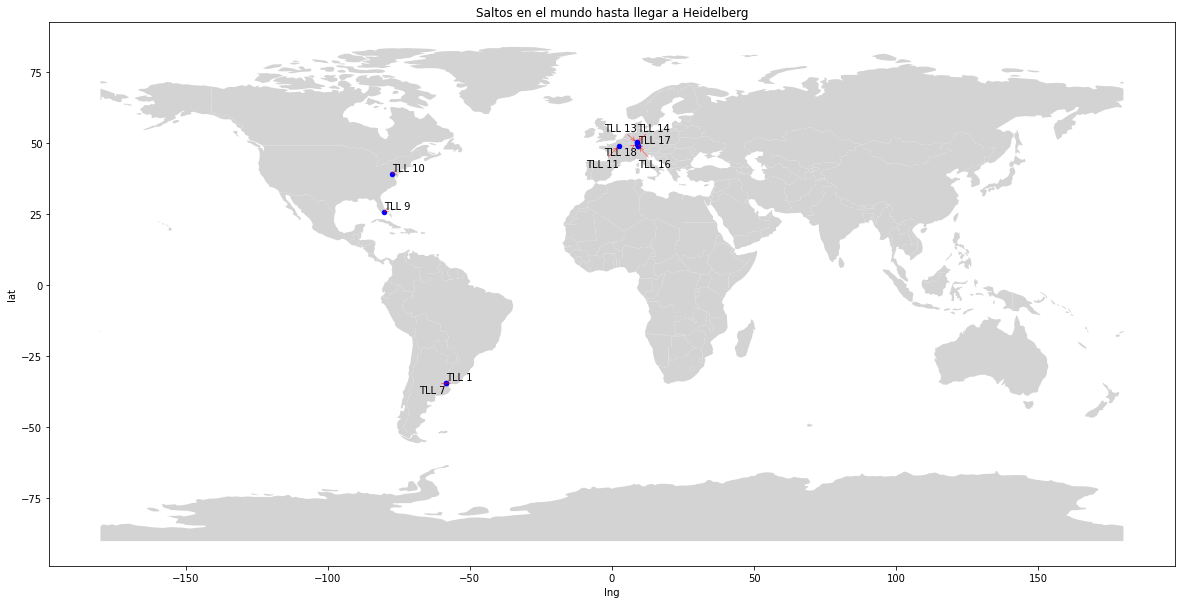

In [77]:
mapaConSaltos(heidelberg, "Heidelberg")

In [78]:
pekin = resultados["Laureano"]["Peking"]
pekin

,TTL,IP,Step RTT,Total RTT
0,1,192.168.0.1,51.994832,51.994832
1,7,195.22.220.56,69.112603,69.112603
2,10,129.250.4.202,19.989610,89.102213
3,11,129.250.2.12,110.228254,199.330466
9,12,129.250.6.177,56.916875,256.247342
4,13,129.250.4.143,85.038650,341.285992
5,14,129.250.2.51,42.853260,384.139252
6,16,203.131.254.214,2.359780,386.499031
10,19,101.4.115.113,4.835383,391.334414
7,23,202.112.41.182,2.219025,393.553440


Agregue
(-58, -35)
(-58, -35)
(-47, -24)
(-74, 41)
(-122, 48)
(140, 36)
(114, 22)
(114, 22)
(116, 40)
(116, 40)
(116, 40)


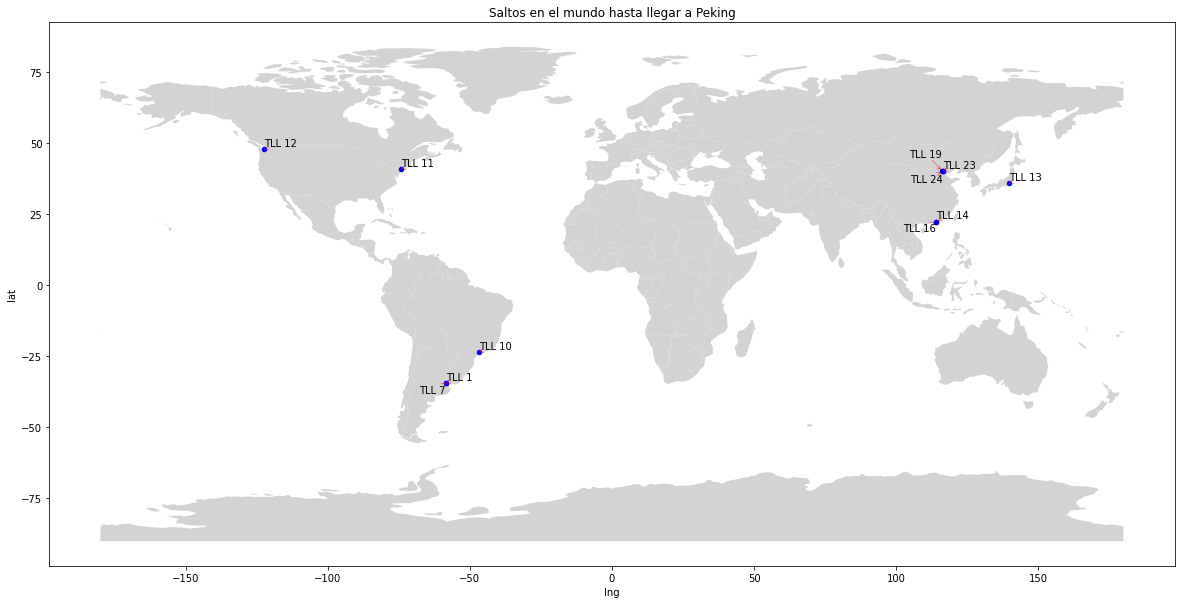

In [79]:
mapaConSaltos(pekin,"Peking")